<a href="https://colab.research.google.com/github/iskra3138/ImageSr/blob/master/XAI_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Thu Feb 11 20:05:14 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import tensorflow as tf
from tensorflow import keras
from scipy.ndimage.interpolation import zoom
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model, save_model
import tensorflow.keras.backend as K
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt
import ipywidgets
from IPython.utils import io
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)
import numpy as np

from time import time

In [3]:
print(f'Tf version : {tf.__version__}')
print(f'Keras version : {keras.__version__}')

Tf version : 2.4.1
Keras version : 2.4.0


In [4]:
model = tf.keras.applications.ResNet50V2(
    include_top=True, weights='imagenet', input_tensor=None, input_shape=None,
    pooling=None, classes=1000, classifier_activation='softmax'
)

102875136/102869336 [==============================] - 1s 0us/step


In [7]:
!wget -O cat.jpg https://static.scientificamerican.com/sciam/cache/file/92E141F8-36E4-4331-BB2EE42AC8674DD3_source.jpg
Image.open('cat.jpg').resize((224,224)).save('cat.jpg')

--2021-02-11 20:06:26--  https://static.scientificamerican.com/sciam/cache/file/92E141F8-36E4-4331-BB2EE42AC8674DD3_source.jpg
Resolving static.scientificamerican.com (static.scientificamerican.com)... 151.101.2.49, 151.101.66.49, 151.101.130.49, ...
Connecting to static.scientificamerican.com (static.scientificamerican.com)|151.101.2.49|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 292933 (286K) [image/jpeg]
Saving to: ‘cat.jpg’

cat.jpg             100%[===================>] 286.07K  --.-KB/s    in 0.007s  

2021-02-11 20:06:26 (39.9 MB/s) - ‘cat.jpg’ saved [292933/292933]



In [8]:
!wget -O cat2.jpg https://img.webmd.com/dtmcms/live/webmd/consumer_assets/site_images/article_thumbnails/slideshows/people_foods_cats_can_eat_slideshow/1800x1200_people_foods_cats_can_eat_slideshow.jpg
Image.open('cat2.jpg').resize((224,224)).save('cat2.jpg')

--2021-02-11 20:06:29--  https://img.webmd.com/dtmcms/live/webmd/consumer_assets/site_images/article_thumbnails/slideshows/people_foods_cats_can_eat_slideshow/1800x1200_people_foods_cats_can_eat_slideshow.jpg
Resolving img.webmd.com (img.webmd.com)... 104.18.5.176, 104.18.4.176
Connecting to img.webmd.com (img.webmd.com)|104.18.5.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 388986 (380K) [image/jpeg]
Saving to: ‘cat2.jpg’

cat2.jpg            100%[===================>] 379.87K  --.-KB/s    in 0.005s  

2021-02-11 20:06:29 (71.5 MB/s) - ‘cat2.jpg’ saved [388986/388986]



In [9]:
!wget -O dog.jpg https://image.cnbcfm.com/api/v1/image/105992231-1561667465295gettyimages-521697453.jpeg
Image.open('dog.jpg').resize((224,224)).save('dog.jpg')

--2021-02-11 20:06:33--  https://image.cnbcfm.com/api/v1/image/105992231-1561667465295gettyimages-521697453.jpeg
Resolving image.cnbcfm.com (image.cnbcfm.com)... 104.82.5.104
Connecting to image.cnbcfm.com (image.cnbcfm.com)|104.82.5.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 218046 (213K) [image/jpeg]
Saving to: ‘dog.jpg’

dog.jpg             100%[===================>] 212.94K  --.-KB/s    in 0.007s  

2021-02-11 20:06:33 (31.6 MB/s) - ‘dog.jpg’ saved [218046/218046]



In [10]:
!wget -O dog2.jpg https://www.sciencemag.org/sites/default/files/styles/article_main_image_-_1280w__no_aspect_/public/dogs_1280p_0.jpg
Image.open('dog2.jpg').resize((224,224)).save('dog2.jpg')

--2021-02-11 20:06:34--  https://www.sciencemag.org/sites/default/files/styles/article_main_image_-_1280w__no_aspect_/public/dogs_1280p_0.jpg
Resolving www.sciencemag.org (www.sciencemag.org)... 52.9.92.212, 52.52.207.131
Connecting to www.sciencemag.org (www.sciencemag.org)|52.9.92.212|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 145305 (142K) [image/jpeg]
Saving to: ‘dog2.jpg’

dog2.jpg            100%[===================>] 141.90K   673KB/s    in 0.2s    

2021-02-11 20:06:35 (673 KB/s) - ‘dog2.jpg’ saved [145305/145305]



In [11]:
!wget -O car.jpg https://www.businessinsider.in/thumb/msid-74437579,width-600,resizemode-4,imgsize-161974/business/auto/news/bs6-deadline-get-discounts-of-up-to-250000-on-bs4-cars-in-india/bs4-car-discounts.jpg
Image.open('car.jpg').resize((224,224)).save('car.jpg')

--2021-02-11 20:06:37--  https://www.businessinsider.in/thumb/msid-74437579,width-600,resizemode-4,imgsize-161974/business/auto/news/bs6-deadline-get-discounts-of-up-to-250000-on-bs4-cars-in-india/bs4-car-discounts.jpg
Resolving www.businessinsider.in (www.businessinsider.in)... 104.103.52.123, 2600:1408:24:49a::3621, 2600:1408:24:492::3621
Connecting to www.businessinsider.in (www.businessinsider.in)|104.103.52.123|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24221 (24K) [image/jpeg]
Saving to: ‘car.jpg’

car.jpg             100%[===================>]  23.65K  --.-KB/s    in 0.001s  

2021-02-11 20:06:37 (21.3 MB/s) - ‘car.jpg’ saved [24221/24221]



Model prediction: class 281 , 68.37%


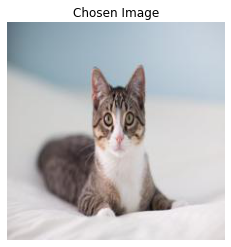

In [12]:
#local test image
image = load_img('cat.jpg', target_size=(224,224,3))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image /= 255.

with io.capture_output() as captured:
    plt.imshow(image[0])
    plt.axis("off")
    plt.title("Chosen Image")
    
pred = model.predict(image) 
print("Model prediction: class", np.argmax(pred), ", {:2.2f}%".format(np.max(pred)*100))

class_index = np.argmax(pred)

In [18]:
# Select layer to use
layer_widget1 = ipywidgets.Text(value="conv2_block1_preact_relu",
                                   description='layer 1 선택:',
                                   style={'description_width':'initial'})
layer_widget2 = ipywidgets.Text(value="conv3_block1_preact_relu",
                                   description='layer 2 선택:',
                                   style={'description_width':'initial'})
layer_widget3 = ipywidgets.Text(value="conv4_block1_preact_relu",
                                   description='layer 3 선택:',
                                   style={'description_width':'initial'})
layer_widget4 = ipywidgets.Text(value="conv5_block1_preact_relu",
                                   description='layer 4 선택:',
                                   style={'description_width':'initial'})
layer_widget5 = ipywidgets.Text(value="post_relu",
                                   description='layer 5 선택:',
                                   style={'description_width':'initial'})

mask_layers = [layer_widget1.value, layer_widget2.value, layer_widget3.value, layer_widget4.value, layer_widget5.value]

In [15]:
def calculate_drop_increase(images, model, exmap, class_index, frac=0.15):
    '''
    inputs:
        images: a 4-D image of size (1 x H x W x 3)
          containing an image in RGB format and of size (H x W)
        model: The base model (in keras)
        exmap: a given explanation map whose completeness is to be evaluated.
        class_index: The class to whom the explanation map is related to.
        frac: The fraction of top pixels selected.
    returns:
        a tuple with 4 calculates values:
        (drop, increase, original_pred, eplanation_pred)
        drop (float): drop rate (between 0 and 1)
        increase (boolean): "1" if increase happened
        original_pred: confidence score for original image
        explanation_pred:  confidence score for the selected top pixels of the image.
    '''
    predictions = model.predict(images)
    # Pre-processing image 
    img=images[0,:,:,:]
    img=img_to_array(img)
    img = np.expand_dims(img,axis=0)
    # Getting the prediction for image
    Y=predictions[0][class_index]
    
    grad_array=np.reshape(exmap, (-1,))
    array_size=int(grad_array.shape[0]*frac)
    thr=np.flip(sorted(grad_array))[array_size]
    exmap1_msk=(exmap>thr)
    exmap1_thr=np.zeros(shape=(1,224,224,3))
    exmap1_thr[0,:,:,0]=img[0,:,:,0]*exmap1_msk
    exmap1_thr[0,:,:,1]=img[0,:,:,1]*exmap1_msk
    exmap1_thr[0,:,:,2]=img[0,:,:,2]*exmap1_msk
    ex_predictions = model.predict(exmap1_thr)[0]
    O1=ex_predictions[class_index]
    etta=(Y-O1)/Y
    return (etta*(etta>0), 1*(etta<0), Y, O1, exmap1_thr[0]/255.)

In [51]:
import cv2
from time import time
import numpy as np

import tensorflow as tf
#############################

def sp_xai(images, model, layer_name, class_index, interp='bilinear', frac = 0.15):
  '''
  Derives feature maps from one, or a couple of layers, and post-processes them
  to convert them to attribution masks.

  inputs:
      images: a 4-D tensor image.
      model: the classification model
      layer_name: name of layer to investigate.
      class_index: the output class according to whom the layer(s) are visualized.
      interp: upsampling technique.
        For now, 'bilinear' and 'nearest' are supported.
      frac: The fraction of top pixels selected.
  returns:
      outputs
      grads
      outgrads
      outputs_preds
      grads_preds
      outgrads_preds
  '''
  assert interp in ['bilinear', 'nearest'], 'Selected upsampling type undefined or unsupported.'
  # Forward pass to get attribution masks.

  ###by LGSP
  conv_outputs=[]
  for layer in model.layers:
    if layer.name == layer_name :
      conv_outputs.append(layer.output)
  conv_outputs.append(model.output)

  feedforward1=tf.keras.models.Model([model.input], [conv_outputs], trainable=False)
  with tf.GradientTape() as tape:
    ff_results=feedforward1([images])[0]
    all_fmap_masks, predictions = ff_results[:-1], ff_results[-1]
    loss = predictions[:, class_index]
  grads = tape.gradient(loss, all_fmap_masks)
  # upsample and normalize masks.

  #start = time()
  outputs = all_fmap_masks[0][0].numpy()
  outgrads = np.einsum('hwc,hwc->hwc', all_fmap_masks[0][0], grads[0][0])
  grads = grads[0][0]

  # outputs
  results = []
  inputs = [outputs, outgrads, grads]
  for tmp_masks in inputs :							   
    if interp == 'bilinear':
      masks = tf.image.resize(tmp_masks, (224,224), method='bilinear').numpy()
    elif interp == 'nearest':
      masks = tf.image.resize(tmp_masks, (224,224), method='nearest').numpy()
    else: raise ValueError('You have selected an unsupported interpolation type.')    
    masks -= np.min(masks, axis=(0,1))
    masks /= (np.max(masks, axis=(0,1))+10e-7)
    w,h,c = masks.shape

    binary_masks = np.transpose(masks, (2, 0, 1))
    binary_masks_flat = binary_masks.reshape(c,-1)
    _, top_n_idx = tf.math.top_k(
        binary_masks_flat, k=int(w*h*frac), sorted=False, name=None
    )
    top_n_idx = top_n_idx.numpy()
    for i in range(c):
      idx = (top_n_idx[i]//w, top_n_idx[i]%w)
      binary_masks[i] = 0
      binary_masks[i][idx] = 1
    binary_masks = np.transpose(binary_masks, (1, 2, 0))

    # creates perturbed images to probe model.
    img = images[0]
    X = np.einsum('hwc,hwn->nhwc', img, binary_masks)
    # second forward pass to valuate attribution maps
    #pred = loss.numpy()
    preds_masked = model.predict(X, verbose=0)[:,class_index]
    results.append(preds_masked)

  #return outputs, grads, outgrads, pred_diffs
  return inputs, results

In [52]:
#sp1
image = load_img('dog.jpg', target_size=(224,224,3))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image /= 255.

pred = model.predict(image) 
print("Model prediction: class", np.argmax(pred), ", {:2.2f}%".format(np.max(pred)*100))

class_index = np.argmax(pred)

top_n = 0.15
start=time()
inputs, results = sp_xai(images = image, 
                  model=model, 
                  layer_name = mask_layers[-1], 
                  class_index = class_index, 
                  interp='bilinear', 
                  frac = 0.15
                  )

Model prediction: class 207 , 45.63%


### dog.jpg

In [ ]:
image = load_img('dog.jpg', target_size=(224,224,3))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image /= 255.

pred = model.predict(image) 
print("Model prediction: class", np.argmax(pred), ", {:2.2f}%".format(np.max(pred)*100))

class_index = np.argmax(pred)

In [53]:
for i in range(len(inputs)) :
  print (inputs[i].shape, results[i].shape)

(7, 7, 2048) (2048,)
(7, 7, 2048) (2048,)
(7, 7, 2048) (2048,)


In [ ]:
import seaborn as sns
from google.colab import widgets


iname = ['outputs', 'outgrads', 'grads']
xname = ['avg', 'max', 'min']

,,
,,
,,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

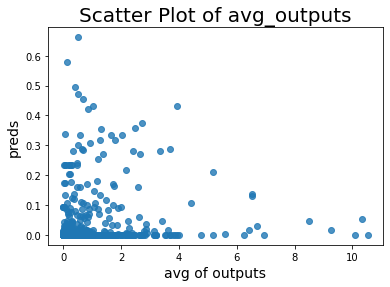

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

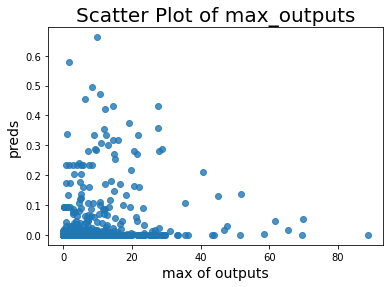

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

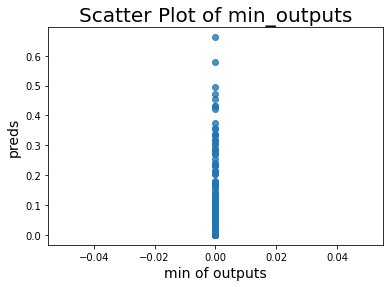

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

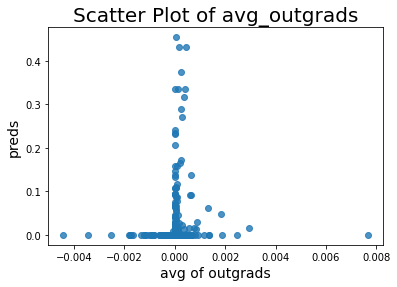

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

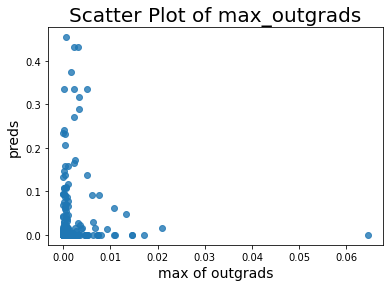

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

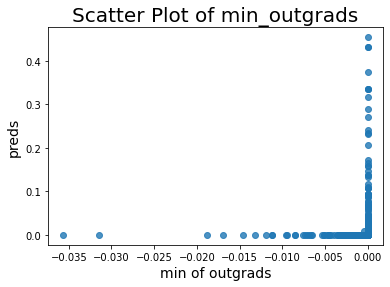

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

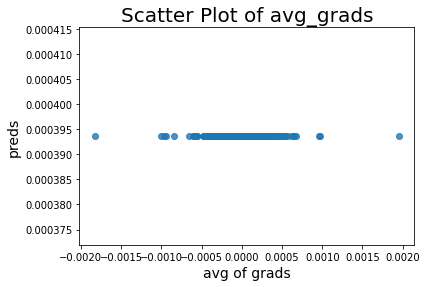

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

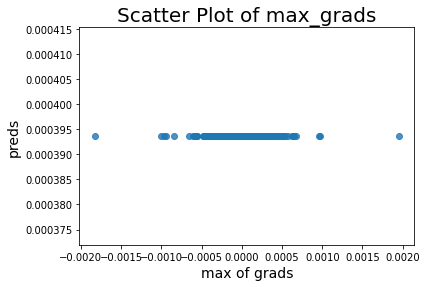

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

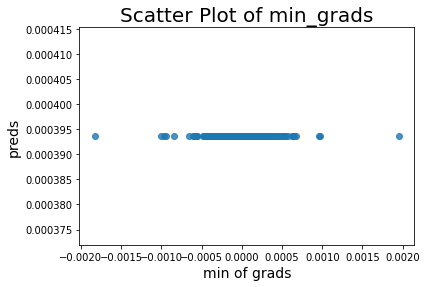

<IPython.core.display.Javascript object>

In [58]:
# post_relu
inputs, results = sp_xai(images = image, 
                  model=model, 
                  layer_name = mask_layers[-1], 
                  class_index = class_index, 
                  interp='bilinear', 
                  frac = 0.15
                  )
grid = widgets.Grid(3, 3)
for i, input in enumerate(inputs) :
  avg = np.mean(input, axis=(0,1))
  min = np.min(input, axis=(0,1))
  max = np.max(input, axis=(0,1))
  for j, x in enumerate([avg,max,min]):
    with grid.output_to(i, j):
      sns.regplot(x=x, y=results[i], fit_reg=False) # no regression line
      plt.title('Scatter Plot of {}_{}'.format(xname[j],iname[i]), fontsize=20)
      plt.xlabel('{} of {}'.format(xname[j], iname[i]), fontsize=14)
      plt.ylabel('preds', fontsize=14)
      plt.show()

,,
,,
,,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

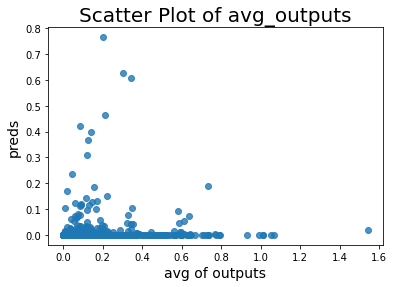

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

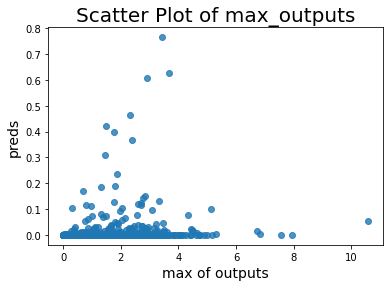

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

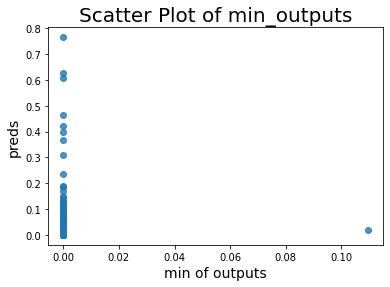

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

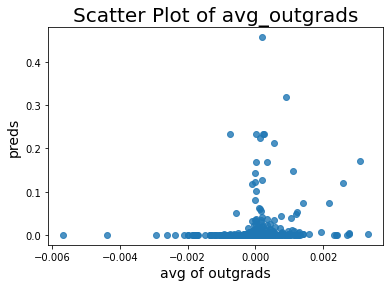

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

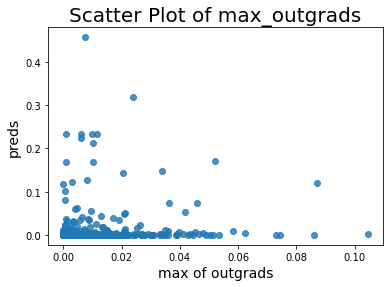

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

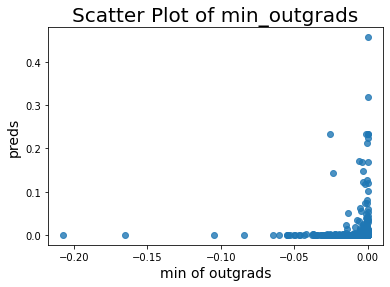

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

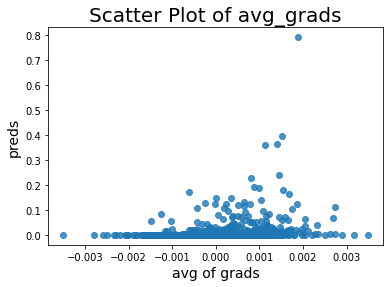

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

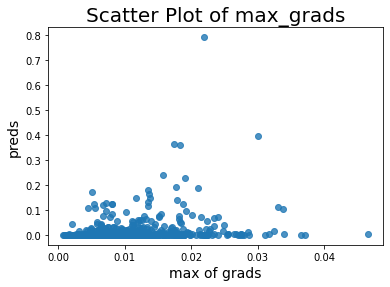

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

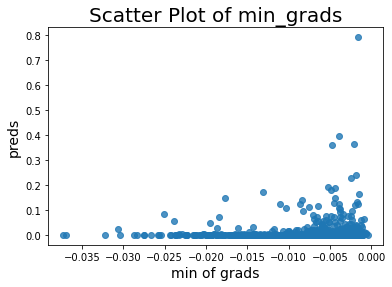

<IPython.core.display.Javascript object>

In [59]:
# conv5
inputs, results = sp_xai(images = image, 
                  model=model, 
                  layer_name = mask_layers[-2], 
                  class_index = class_index, 
                  interp='bilinear', 
                  frac = 0.15
                  )
grid = widgets.Grid(3, 3)
for i, input in enumerate(inputs) :
  avg = np.mean(input, axis=(0,1))
  min = np.min(input, axis=(0,1))
  max = np.max(input, axis=(0,1))
  for j, x in enumerate([avg,max,min]):
    with grid.output_to(i, j):
      sns.regplot(x=x, y=results[i], fit_reg=False) # no regression line
      plt.title('Scatter Plot of {}_{}'.format(xname[j],iname[i]), fontsize=20)
      plt.xlabel('{} of {}'.format(xname[j], iname[i]), fontsize=14)
      plt.ylabel('preds', fontsize=14)
      plt.show()

,,
,,
,,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

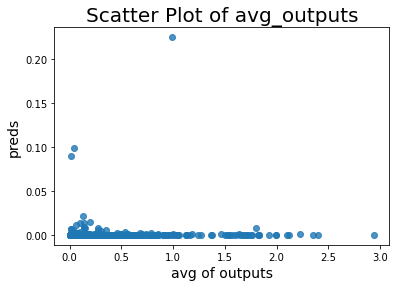

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

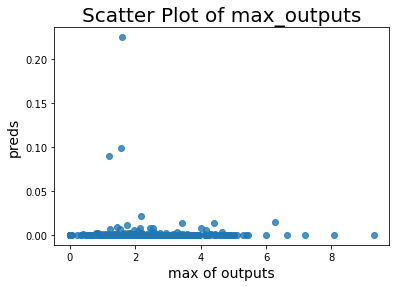

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

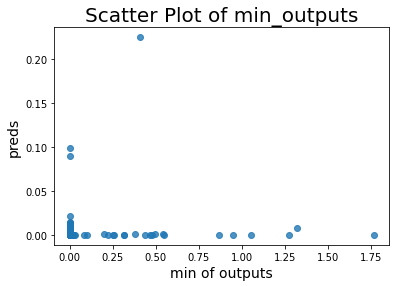

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

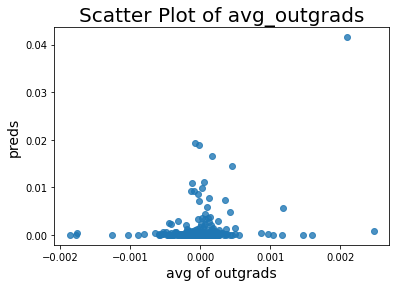

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

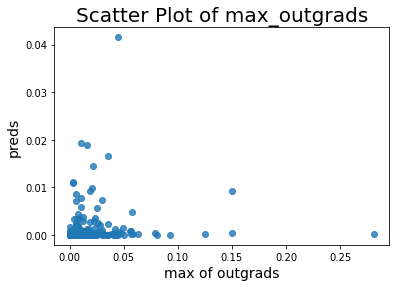

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

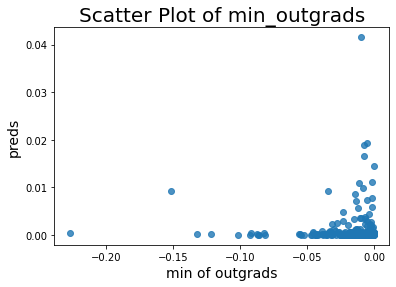

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

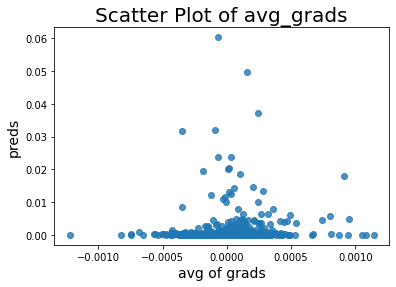

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

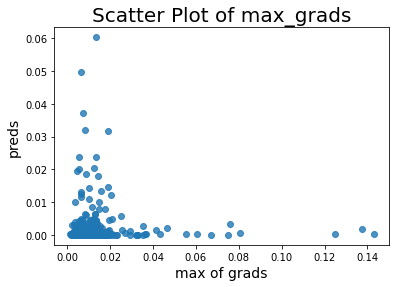

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

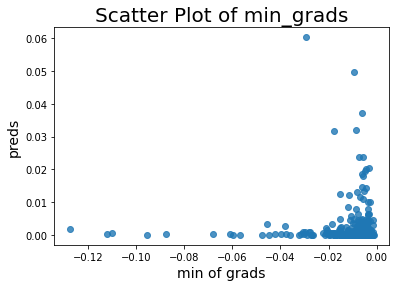

<IPython.core.display.Javascript object>

In [60]:
# conv4
inputs, results = sp_xai(images = image, 
                  model=model, 
                  layer_name = mask_layers[-3], 
                  class_index = class_index, 
                  interp='bilinear', 
                  frac = 0.15
                  )
grid = widgets.Grid(3, 3)
for i, input in enumerate(inputs) :
  avg = np.mean(input, axis=(0,1))
  min = np.min(input, axis=(0,1))
  max = np.max(input, axis=(0,1))
  for j, x in enumerate([avg,max,min]):
    with grid.output_to(i, j):
      sns.regplot(x=x, y=results[i], fit_reg=False) # no regression line
      plt.title('Scatter Plot of {}_{}'.format(xname[j],iname[i]), fontsize=20)
      plt.xlabel('{} of {}'.format(xname[j], iname[i]), fontsize=14)
      plt.ylabel('preds', fontsize=14)
      plt.show()

,,
,,
,,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

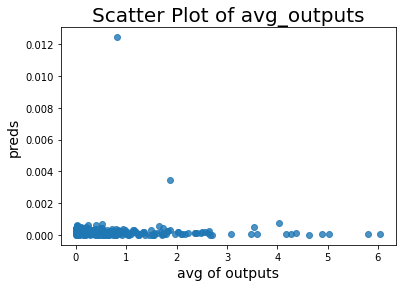

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

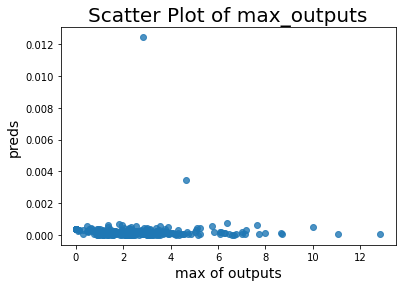

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

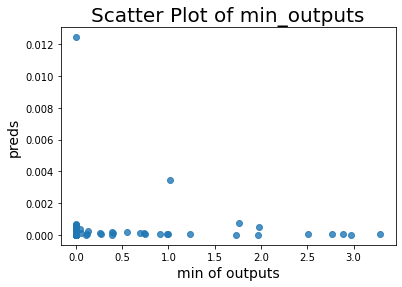

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

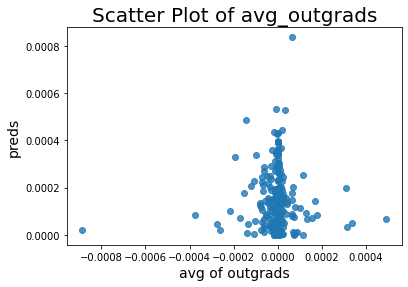

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

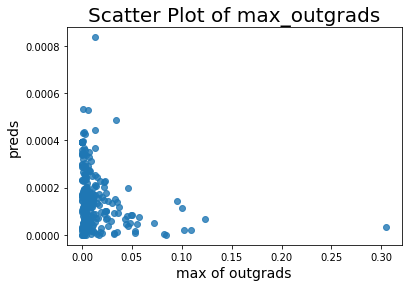

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

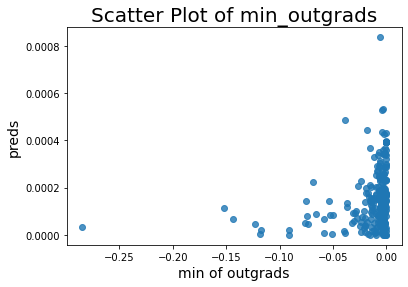

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

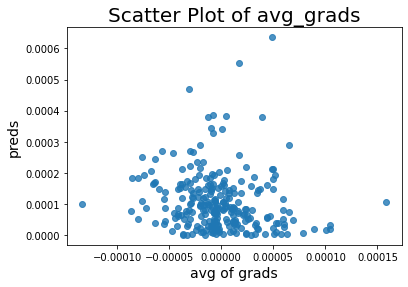

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

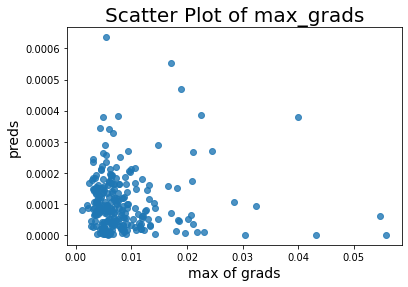

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

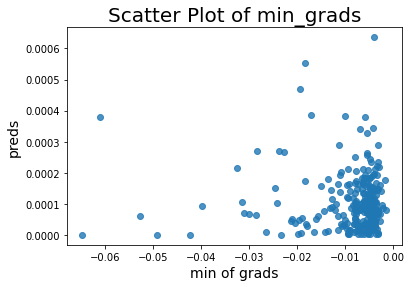

<IPython.core.display.Javascript object>

In [61]:
# conv3
inputs, results = sp_xai(images = image, 
                  model=model, 
                  layer_name = mask_layers[-4], 
                  class_index = class_index, 
                  interp='bilinear', 
                  frac = 0.15
                  )
grid = widgets.Grid(3, 3)
for i, input in enumerate(inputs) :
  avg = np.mean(input, axis=(0,1))
  min = np.min(input, axis=(0,1))
  max = np.max(input, axis=(0,1))
  for j, x in enumerate([avg,max,min]):
    with grid.output_to(i, j):
      sns.regplot(x=x, y=results[i], fit_reg=False) # no regression line
      plt.title('Scatter Plot of {}_{}'.format(xname[j],iname[i]), fontsize=20)
      plt.xlabel('{} of {}'.format(xname[j], iname[i]), fontsize=14)
      plt.ylabel('preds', fontsize=14)
      plt.show()

,,
,,
,,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

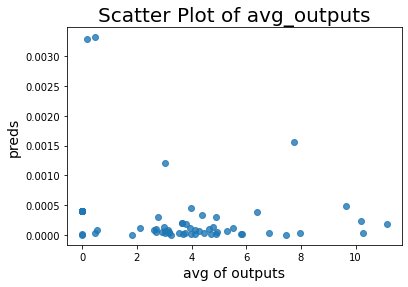

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

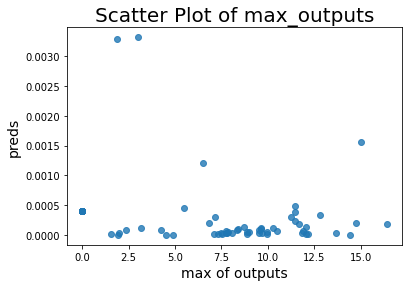

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

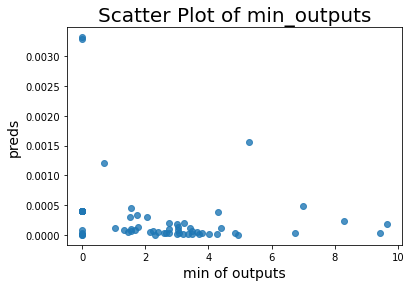

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

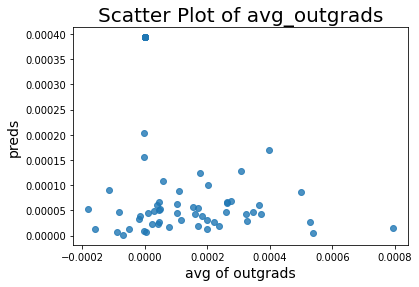

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

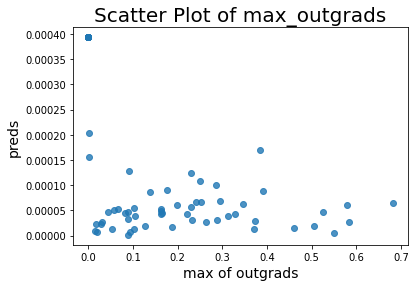

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

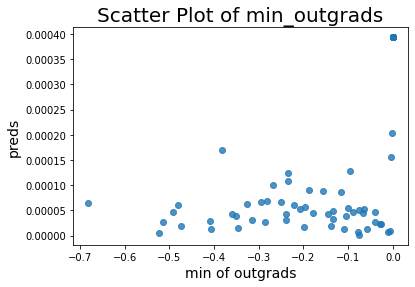

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

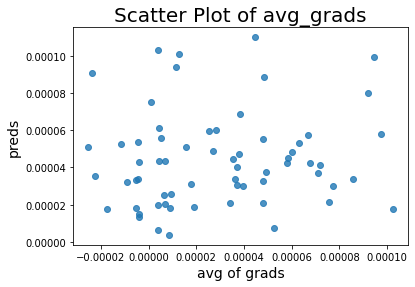

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

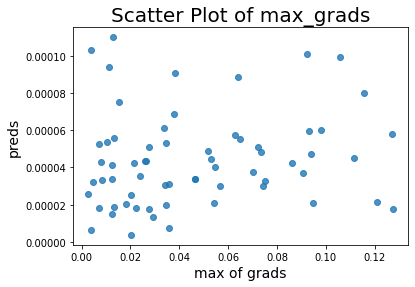

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

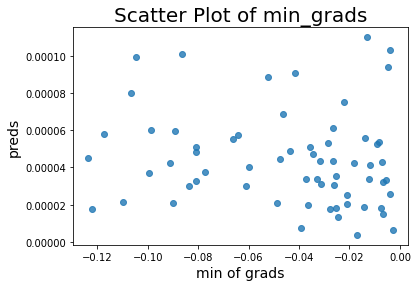

<IPython.core.display.Javascript object>

In [62]:
# conv2
inputs, results = sp_xai(images = image, 
                  model=model, 
                  layer_name = mask_layers[-5], 
                  class_index = class_index, 
                  interp='bilinear', 
                  frac = 0.15
                  )
grid = widgets.Grid(3, 3)
for i, input in enumerate(inputs) :
  avg = np.mean(input, axis=(0,1))
  min = np.min(input, axis=(0,1))
  max = np.max(input, axis=(0,1))
  for j, x in enumerate([avg,max,min]):
    with grid.output_to(i, j):
      sns.regplot(x=x, y=results[i], fit_reg=False) # no regression line
      plt.title('Scatter Plot of {}_{}'.format(xname[j],iname[i]), fontsize=20)
      plt.xlabel('{} of {}'.format(xname[j], iname[i]), fontsize=14)
      plt.ylabel('preds', fontsize=14)
      plt.show()

### cat.jpg

In [63]:
image = load_img('cat.jpg', target_size=(224,224,3))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image /= 255.

pred = model.predict(image) 
print("Model prediction: class", np.argmax(pred), ", {:2.2f}%".format(np.max(pred)*100))

class_index = np.argmax(pred)

Model prediction: class 281 , 68.37%


In [65]:
import seaborn as sns
from google.colab import widgets


iname = ['outputs', 'outgrads', 'grads']
xname = ['avg', 'max', 'min']

,,
,,
,,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

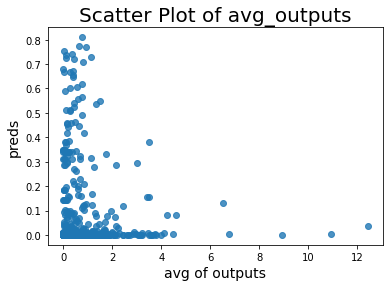

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

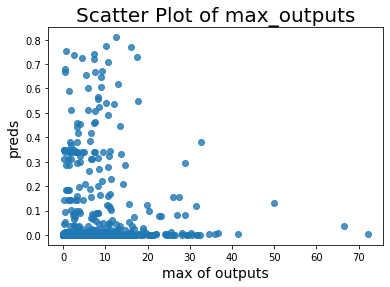

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

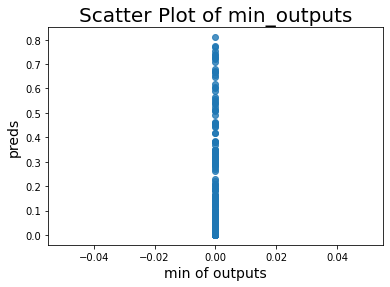

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

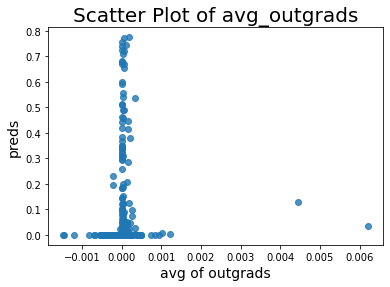

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

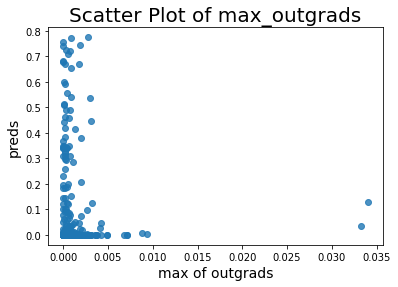

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

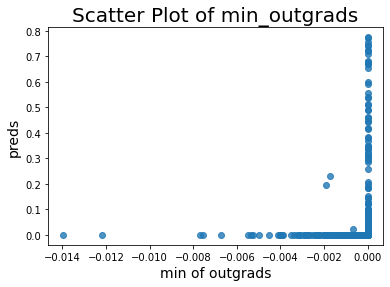

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

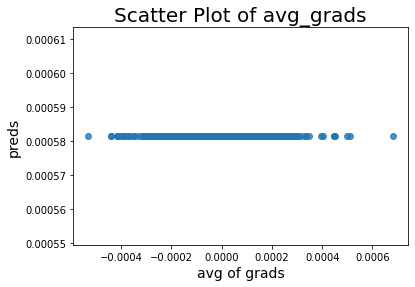

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

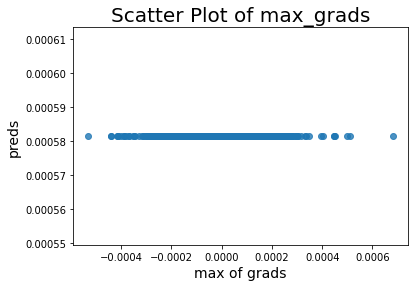

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

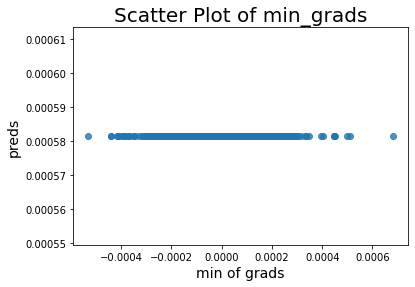

<IPython.core.display.Javascript object>

In [66]:
# post_relu
inputs, results = sp_xai(images = image, 
                  model=model, 
                  layer_name = mask_layers[-1], 
                  class_index = class_index, 
                  interp='bilinear', 
                  frac = 0.15
                  )
grid = widgets.Grid(3, 3)
for i, input in enumerate(inputs) :
  avg = np.mean(input, axis=(0,1))
  min = np.min(input, axis=(0,1))
  max = np.max(input, axis=(0,1))
  for j, x in enumerate([avg,max,min]):
    with grid.output_to(i, j):
      sns.regplot(x=x, y=results[i], fit_reg=False) # no regression line
      plt.title('Scatter Plot of {}_{}'.format(xname[j],iname[i]), fontsize=20)
      plt.xlabel('{} of {}'.format(xname[j], iname[i]), fontsize=14)
      plt.ylabel('preds', fontsize=14)
      plt.show()

,,
,,
,,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

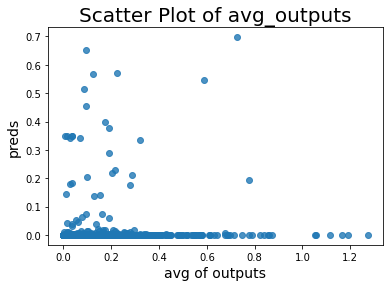

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

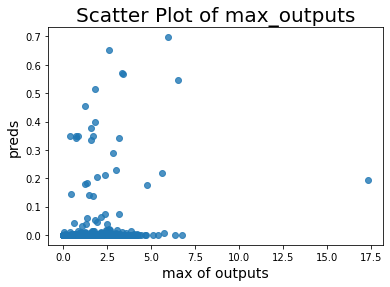

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

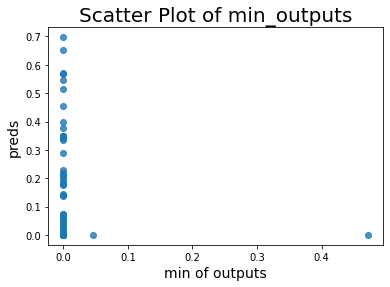

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

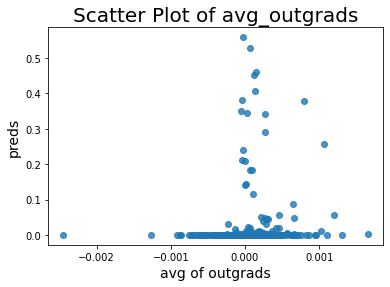

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

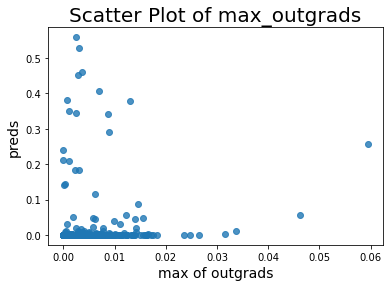

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

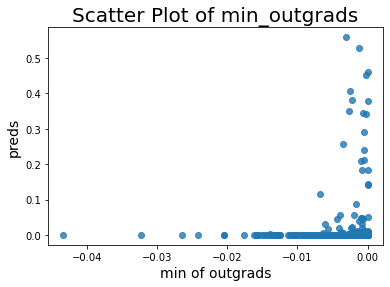

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

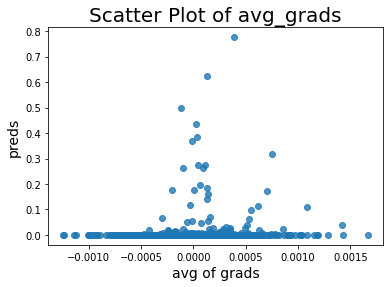

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

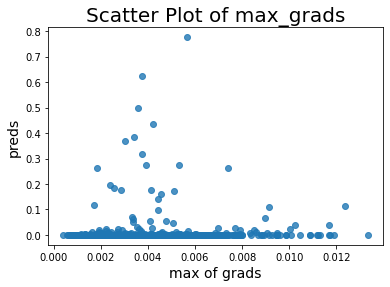

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

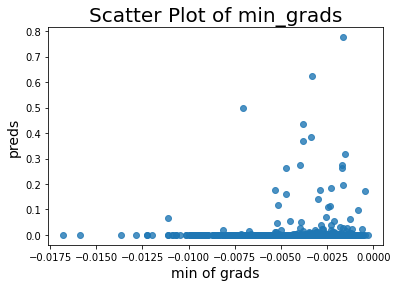

<IPython.core.display.Javascript object>

In [67]:
# conv5
inputs, results = sp_xai(images = image, 
                  model=model, 
                  layer_name = mask_layers[-2], 
                  class_index = class_index, 
                  interp='bilinear', 
                  frac = 0.15
                  )
grid = widgets.Grid(3, 3)
for i, input in enumerate(inputs) :
  avg = np.mean(input, axis=(0,1))
  min = np.min(input, axis=(0,1))
  max = np.max(input, axis=(0,1))
  for j, x in enumerate([avg,max,min]):
    with grid.output_to(i, j):
      sns.regplot(x=x, y=results[i], fit_reg=False) # no regression line
      plt.title('Scatter Plot of {}_{}'.format(xname[j],iname[i]), fontsize=20)
      plt.xlabel('{} of {}'.format(xname[j], iname[i]), fontsize=14)
      plt.ylabel('preds', fontsize=14)
      plt.show()

,,
,,
,,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

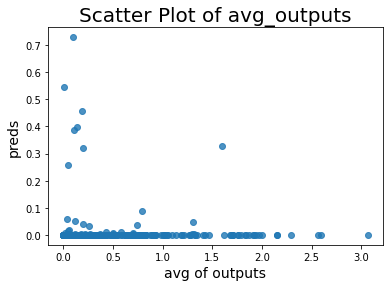

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

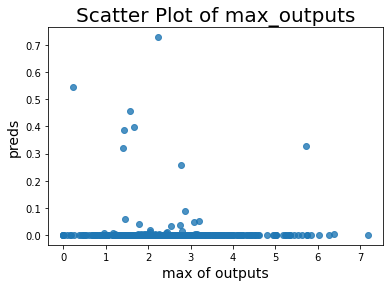

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

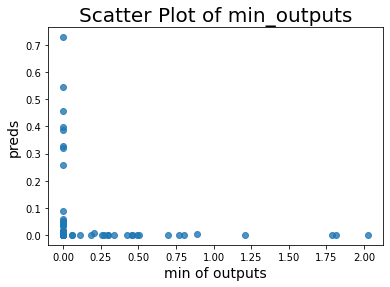

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

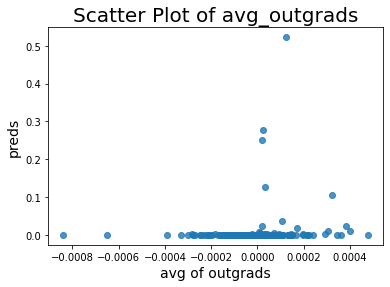

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

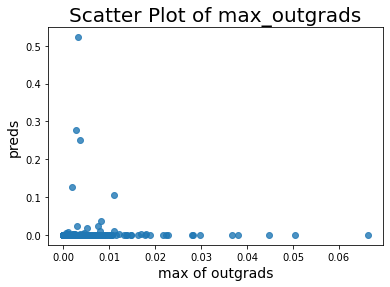

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

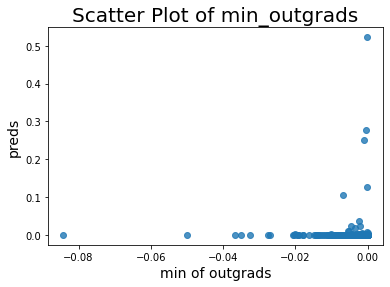

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

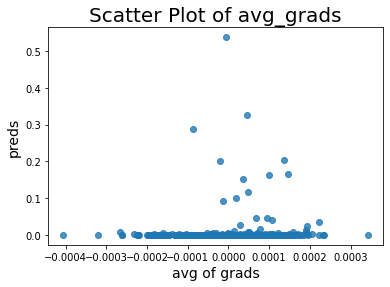

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

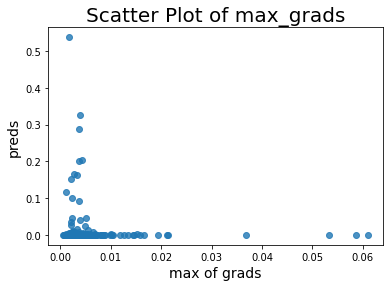

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

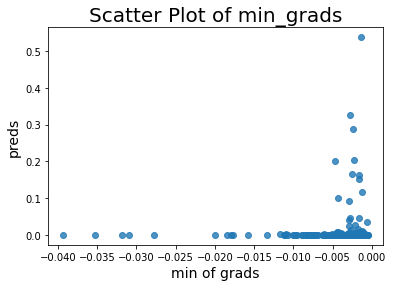

<IPython.core.display.Javascript object>

In [68]:
# conv4
inputs, results = sp_xai(images = image, 
                  model=model, 
                  layer_name = mask_layers[-3], 
                  class_index = class_index, 
                  interp='bilinear', 
                  frac = 0.15
                  )
grid = widgets.Grid(3, 3)
for i, input in enumerate(inputs) :
  avg = np.mean(input, axis=(0,1))
  min = np.min(input, axis=(0,1))
  max = np.max(input, axis=(0,1))
  for j, x in enumerate([avg,max,min]):
    with grid.output_to(i, j):
      sns.regplot(x=x, y=results[i], fit_reg=False) # no regression line
      plt.title('Scatter Plot of {}_{}'.format(xname[j],iname[i]), fontsize=20)
      plt.xlabel('{} of {}'.format(xname[j], iname[i]), fontsize=14)
      plt.ylabel('preds', fontsize=14)
      plt.show()

,,
,,
,,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

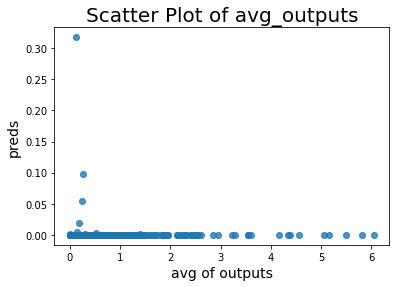

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

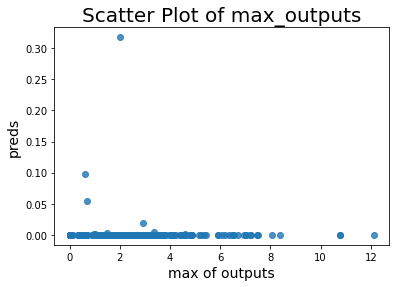

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

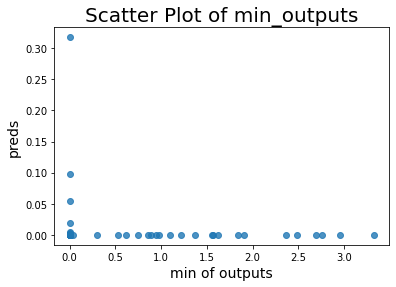

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

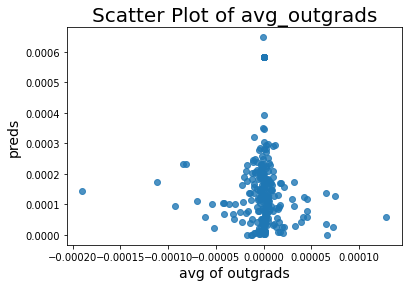

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

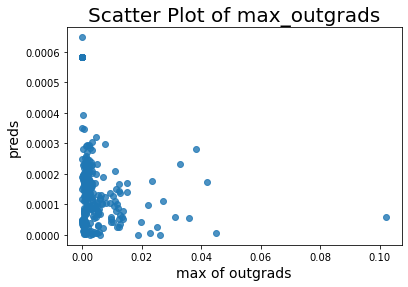

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

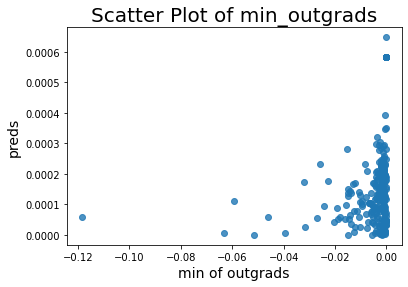

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

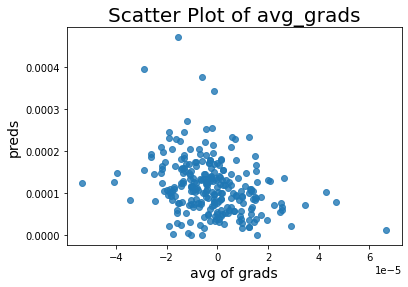

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

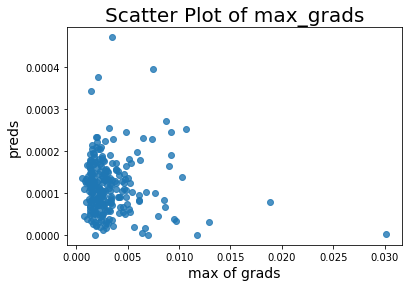

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

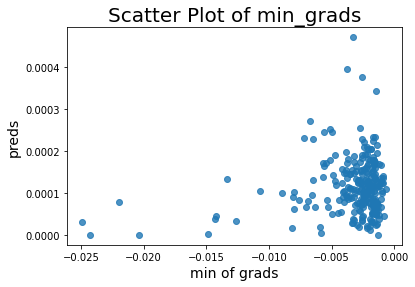

<IPython.core.display.Javascript object>

In [69]:
# conv3
inputs, results = sp_xai(images = image, 
                  model=model, 
                  layer_name = mask_layers[-4], 
                  class_index = class_index, 
                  interp='bilinear', 
                  frac = 0.15
                  )
grid = widgets.Grid(3, 3)
for i, input in enumerate(inputs) :
  avg = np.mean(input, axis=(0,1))
  min = np.min(input, axis=(0,1))
  max = np.max(input, axis=(0,1))
  for j, x in enumerate([avg,max,min]):
    with grid.output_to(i, j):
      sns.regplot(x=x, y=results[i], fit_reg=False) # no regression line
      plt.title('Scatter Plot of {}_{}'.format(xname[j],iname[i]), fontsize=20)
      plt.xlabel('{} of {}'.format(xname[j], iname[i]), fontsize=14)
      plt.ylabel('preds', fontsize=14)
      plt.show()

,,
,,
,,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

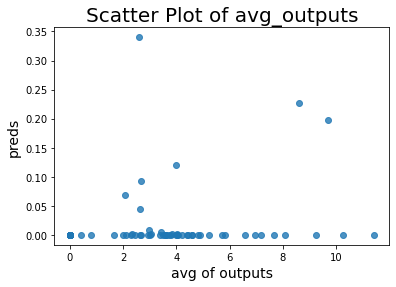

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

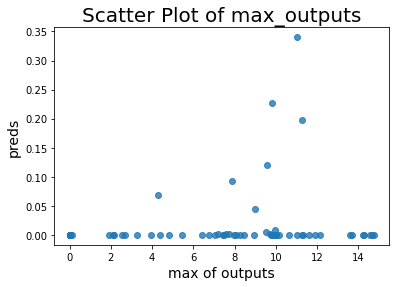

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

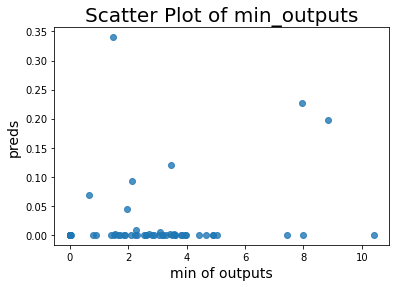

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

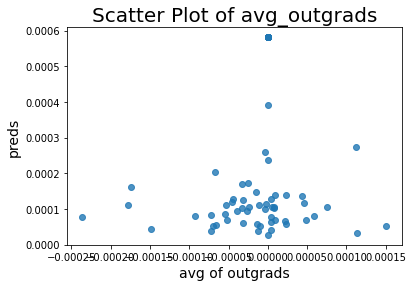

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

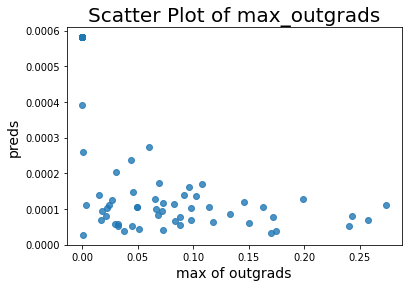

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

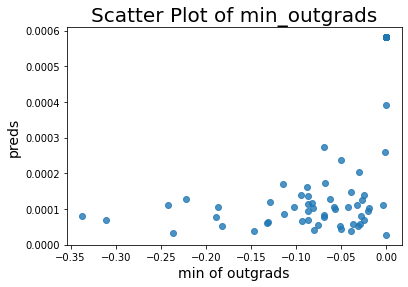

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

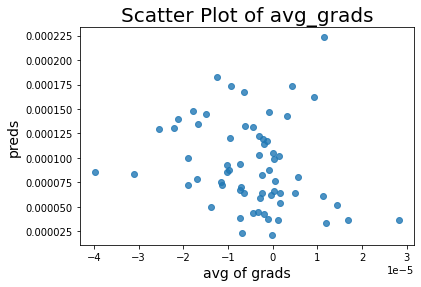

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

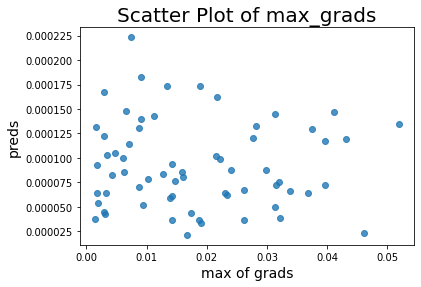

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

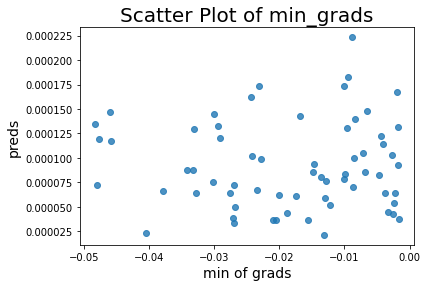

<IPython.core.display.Javascript object>

In [70]:
# conv2
inputs, results = sp_xai(images = image, 
                  model=model, 
                  layer_name = mask_layers[-5], 
                  class_index = class_index, 
                  interp='bilinear', 
                  frac = 0.15
                  )
grid = widgets.Grid(3, 3)
for i, input in enumerate(inputs) :
  avg = np.mean(input, axis=(0,1))
  min = np.min(input, axis=(0,1))
  max = np.max(input, axis=(0,1))
  for j, x in enumerate([avg,max,min]):
    with grid.output_to(i, j):
      sns.regplot(x=x, y=results[i], fit_reg=False) # no regression line
      plt.title('Scatter Plot of {}_{}'.format(xname[j],iname[i]), fontsize=20)
      plt.xlabel('{} of {}'.format(xname[j], iname[i]), fontsize=14)
      plt.ylabel('preds', fontsize=14)
      plt.show()

### dog2.jpg

In [71]:
image = load_img('dog2.jpg', target_size=(224,224,3))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image /= 255.

pred = model.predict(image) 
print("Model prediction: class", np.argmax(pred), ", {:2.2f}%".format(np.max(pred)*100))

class_index = np.argmax(pred)

Model prediction: class 208 , 90.19%


In [73]:
import seaborn as sns
from google.colab import widgets


iname = ['outputs', 'outgrads', 'grads']
xname = ['avg', 'max', 'min']

,,
,,
,,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

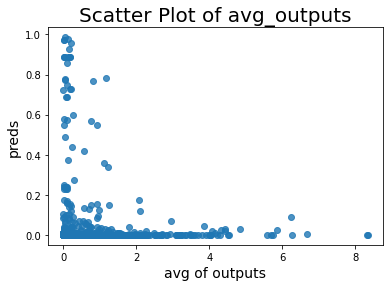

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

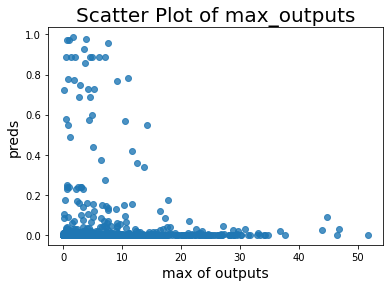

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

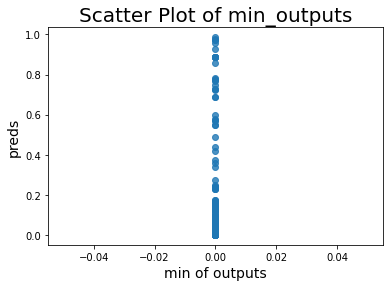

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

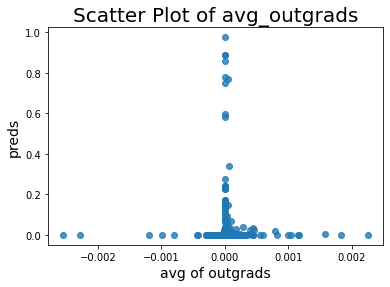

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

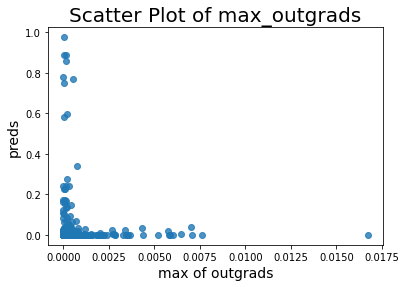

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

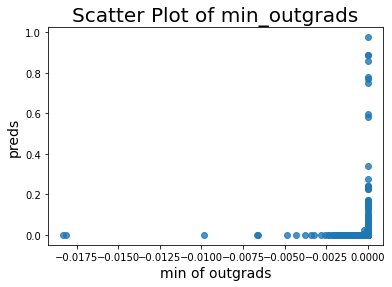

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

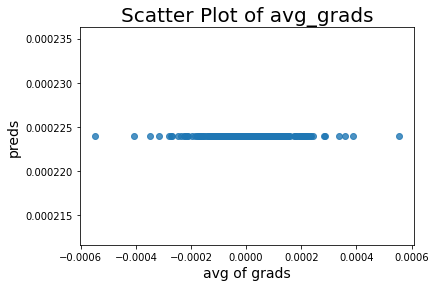

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

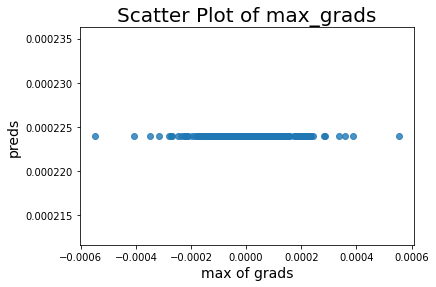

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

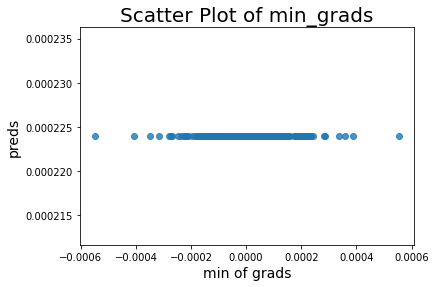

<IPython.core.display.Javascript object>

In [74]:
# post_relu
inputs, results = sp_xai(images = image, 
                  model=model, 
                  layer_name = mask_layers[-1], 
                  class_index = class_index, 
                  interp='bilinear', 
                  frac = 0.15
                  )
grid = widgets.Grid(3, 3)
for i, input in enumerate(inputs) :
  avg = np.mean(input, axis=(0,1))
  min = np.min(input, axis=(0,1))
  max = np.max(input, axis=(0,1))
  for j, x in enumerate([avg,max,min]):
    with grid.output_to(i, j):
      sns.regplot(x=x, y=results[i], fit_reg=False) # no regression line
      plt.title('Scatter Plot of {}_{}'.format(xname[j],iname[i]), fontsize=20)
      plt.xlabel('{} of {}'.format(xname[j], iname[i]), fontsize=14)
      plt.ylabel('preds', fontsize=14)
      plt.show()

,,
,,
,,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

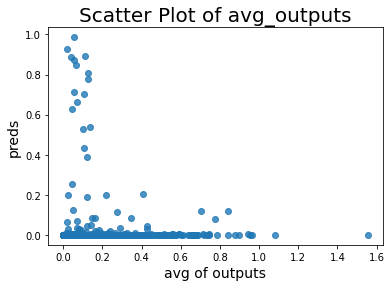

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

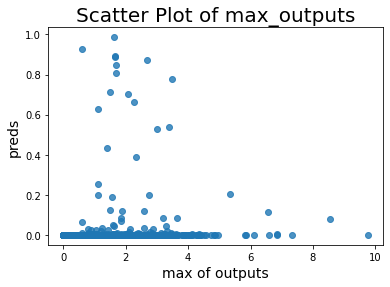

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

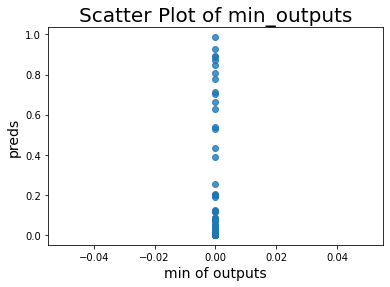

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

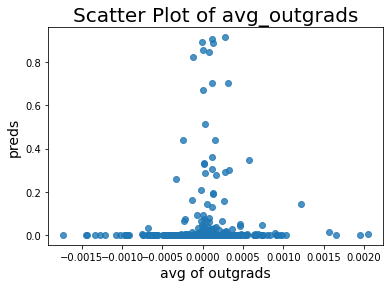

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

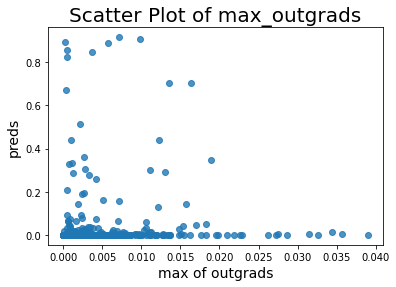

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

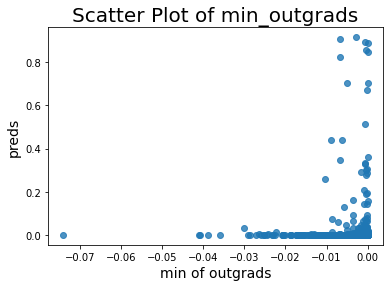

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

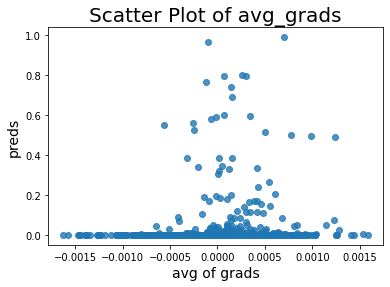

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

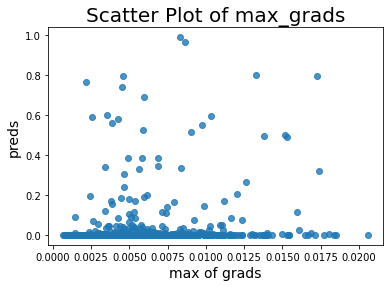

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

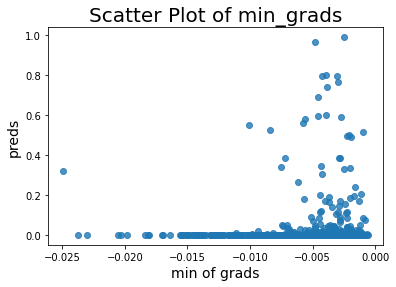

<IPython.core.display.Javascript object>

In [75]:
# conv5
inputs, results = sp_xai(images = image, 
                  model=model, 
                  layer_name = mask_layers[-2], 
                  class_index = class_index, 
                  interp='bilinear', 
                  frac = 0.15
                  )
grid = widgets.Grid(3, 3)
for i, input in enumerate(inputs) :
  avg = np.mean(input, axis=(0,1))
  min = np.min(input, axis=(0,1))
  max = np.max(input, axis=(0,1))
  for j, x in enumerate([avg,max,min]):
    with grid.output_to(i, j):
      sns.regplot(x=x, y=results[i], fit_reg=False) # no regression line
      plt.title('Scatter Plot of {}_{}'.format(xname[j],iname[i]), fontsize=20)
      plt.xlabel('{} of {}'.format(xname[j], iname[i]), fontsize=14)
      plt.ylabel('preds', fontsize=14)
      plt.show()

,,
,,
,,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

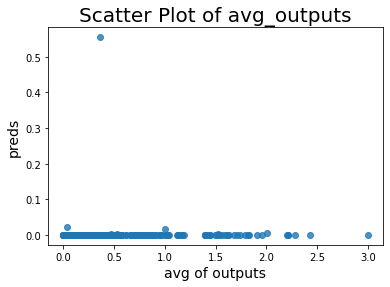

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

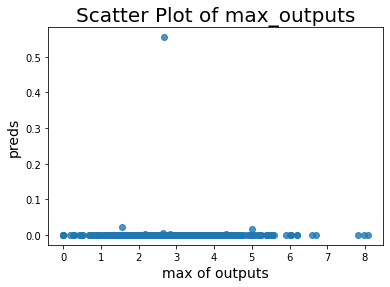

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

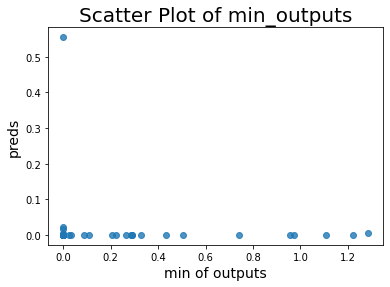

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

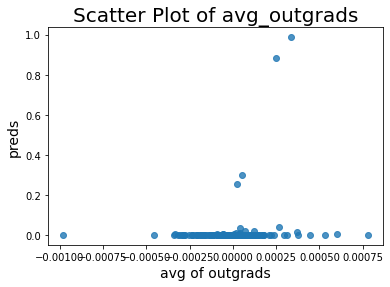

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

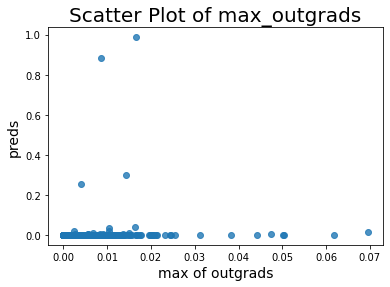

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

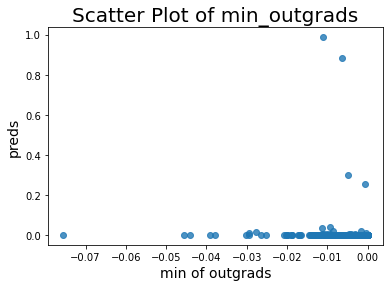

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

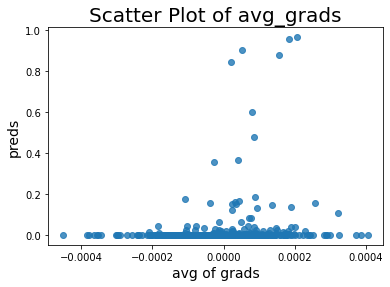

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

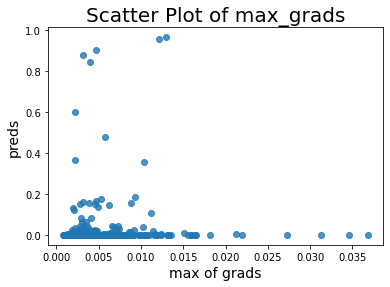

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

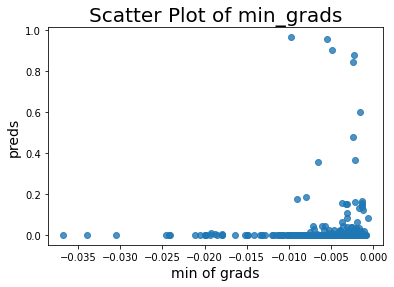

<IPython.core.display.Javascript object>

In [76]:
# conv4
inputs, results = sp_xai(images = image, 
                  model=model, 
                  layer_name = mask_layers[-3], 
                  class_index = class_index, 
                  interp='bilinear', 
                  frac = 0.15
                  )
grid = widgets.Grid(3, 3)
for i, input in enumerate(inputs) :
  avg = np.mean(input, axis=(0,1))
  min = np.min(input, axis=(0,1))
  max = np.max(input, axis=(0,1))
  for j, x in enumerate([avg,max,min]):
    with grid.output_to(i, j):
      sns.regplot(x=x, y=results[i], fit_reg=False) # no regression line
      plt.title('Scatter Plot of {}_{}'.format(xname[j],iname[i]), fontsize=20)
      plt.xlabel('{} of {}'.format(xname[j], iname[i]), fontsize=14)
      plt.ylabel('preds', fontsize=14)
      plt.show()

,,
,,
,,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

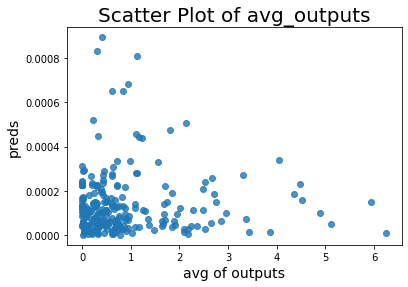

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

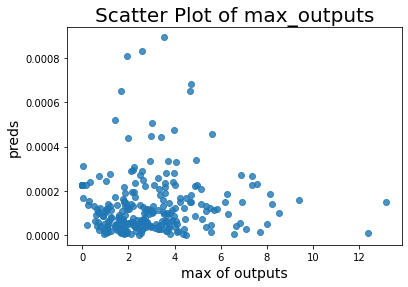

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

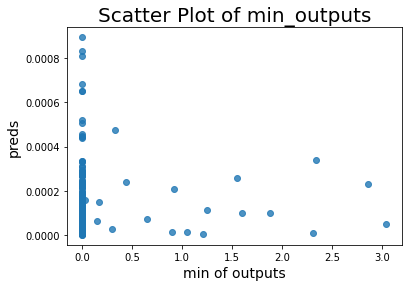

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

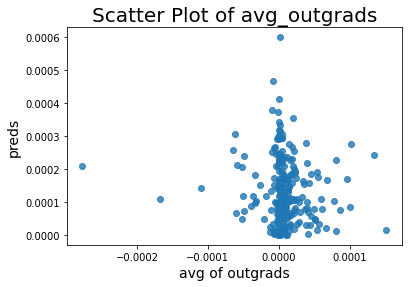

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

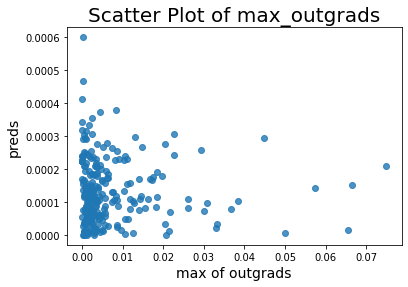

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

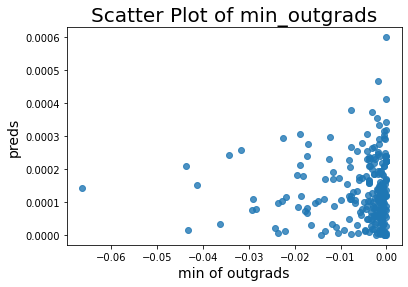

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

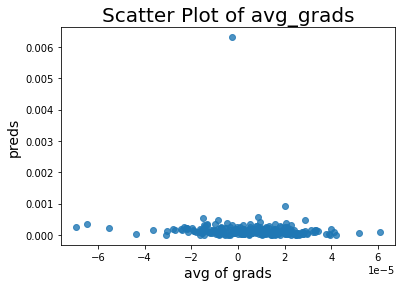

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

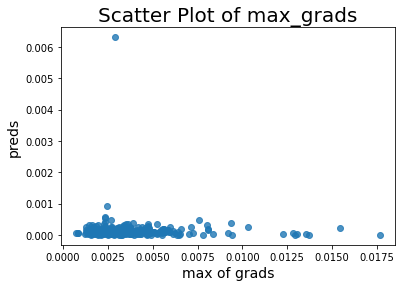

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

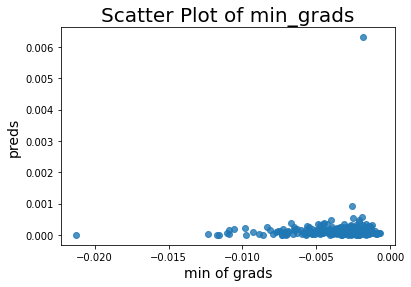

<IPython.core.display.Javascript object>

In [77]:
# conv3
inputs, results = sp_xai(images = image, 
                  model=model, 
                  layer_name = mask_layers[-4], 
                  class_index = class_index, 
                  interp='bilinear', 
                  frac = 0.15
                  )
grid = widgets.Grid(3, 3)
for i, input in enumerate(inputs) :
  avg = np.mean(input, axis=(0,1))
  min = np.min(input, axis=(0,1))
  max = np.max(input, axis=(0,1))
  for j, x in enumerate([avg,max,min]):
    with grid.output_to(i, j):
      sns.regplot(x=x, y=results[i], fit_reg=False) # no regression line
      plt.title('Scatter Plot of {}_{}'.format(xname[j],iname[i]), fontsize=20)
      plt.xlabel('{} of {}'.format(xname[j], iname[i]), fontsize=14)
      plt.ylabel('preds', fontsize=14)
      plt.show()

,,
,,
,,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

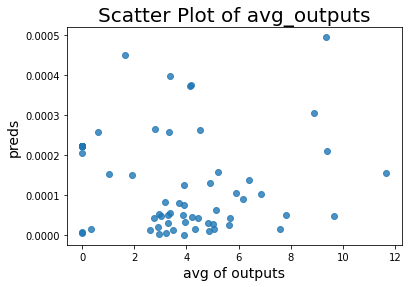

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

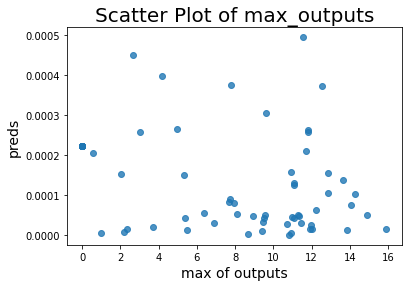

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

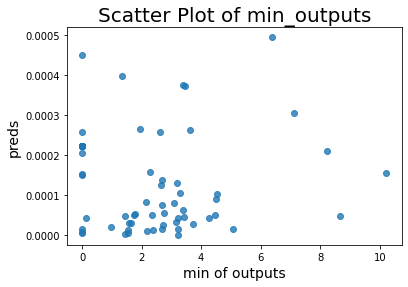

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

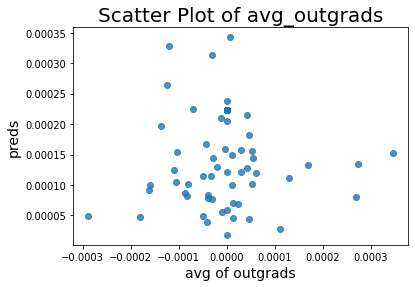

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

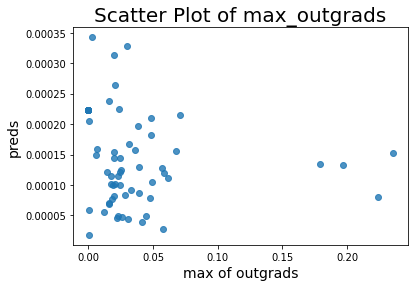

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

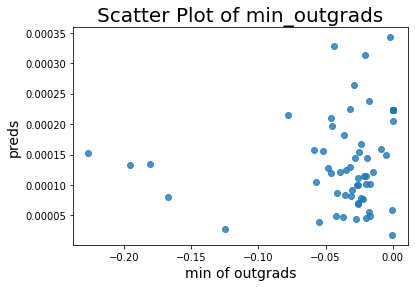

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

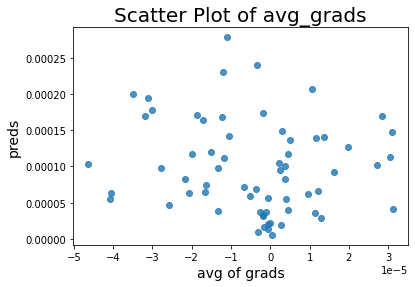

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

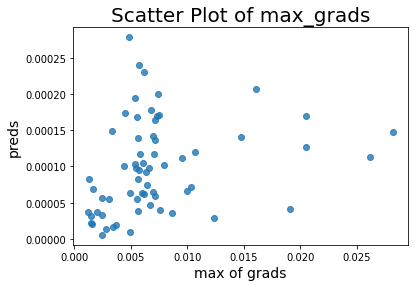

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

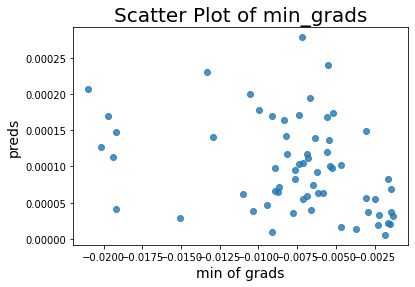

<IPython.core.display.Javascript object>

In [78]:
# conv2
inputs, results = sp_xai(images = image, 
                  model=model, 
                  layer_name = mask_layers[-5], 
                  class_index = class_index, 
                  interp='bilinear', 
                  frac = 0.15
                  )
grid = widgets.Grid(3, 3)
for i, input in enumerate(inputs) :
  avg = np.mean(input, axis=(0,1))
  min = np.min(input, axis=(0,1))
  max = np.max(input, axis=(0,1))
  for j, x in enumerate([avg,max,min]):
    with grid.output_to(i, j):
      sns.regplot(x=x, y=results[i], fit_reg=False) # no regression line
      plt.title('Scatter Plot of {}_{}'.format(xname[j],iname[i]), fontsize=20)
      plt.xlabel('{} of {}'.format(xname[j], iname[i]), fontsize=14)
      plt.ylabel('preds', fontsize=14)
      plt.show()